## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 40 (delta 10), reused 2 (delta 2), pack-reused 25
Receiving objects: 100% (40/40), 11.00 MiB | 9.33 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [3]:
# Q2.1
# Load the ./data/heart_failure_clinical_records_dataset.csv. Are there any NA's to handle? use .drop() to remove time from the dataframe.
df = pd.read_csv('/content/knn/data/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
ndf = df.copy()
for column in df:
  ndf[column] = ndf[column].isnull()
  print(ndf[column].describe())
  # It appears there are no NA values to handle.

count       299
unique        1
top       False
freq        299
Name: age, dtype: object
count       299
unique        1
top       False
freq        299
Name: anaemia, dtype: object
count       299
unique        1
top       False
freq        299
Name: creatinine_phosphokinase, dtype: object
count       299
unique        1
top       False
freq        299
Name: diabetes, dtype: object
count       299
unique        1
top       False
freq        299
Name: ejection_fraction, dtype: object
count       299
unique        1
top       False
freq        299
Name: high_blood_pressure, dtype: object
count       299
unique        1
top       False
freq        299
Name: platelets, dtype: object
count       299
unique        1
top       False
freq        299
Name: serum_creatinine, dtype: object
count       299
unique        1
top       False
freq        299
Name: serum_sodium, dtype: object
count       299
unique        1
top       False
freq        299
Name: sex, dtype: object
count       299
unique

In [5]:
df = df.drop(columns='time')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [6]:
# Q2.2
# Make a correlation matrix. What variables are strongly associated with a death event?
df.corr(method='pearson', min_periods=1, numeric_only=False)
# Age, ejection fraction, and serum creatine are most strongly associated with a death event.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [7]:
# Q2.3
# For the dummy variables anaemia, diabetes, high_blood_pressure, sex, and smoking, compute a summary table of DEATH_EVENT grouped by the variable.
dummy = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
de = 'DEATH_EVENT'
for var in dummy:
  print(df.loc[:,[var,de]].groupby(var).describe())
# For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
# Anaemia and high bp have a higher proportion die when positive (1).

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

In [8]:
# Q2.4
# On the basis of your answers from 2 and 3, build a matrix  X  of the variables you think are most predictive of a death,
# and a variable  y  equal to DEATH_EVENT.
y = df[de]
X = df.loc[:,['anaemia','high_blood_pressure']]
X.describe()

,anaemia,high_blood_pressure
count,299.000000,299.000000
mean,0.431438,0.351171
std,0.496107,0.478136
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [9]:
# Q2.5
# Maxmin normalize all of the variables in X.
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
X = X.apply(maxmin)
X.describe()

,anaemia,high_blood_pressure
count,299.000000,299.000000
mean,0.431438,0.351171
std,0.496107,0.478136
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [10]:
# Q2.6
# Split the sample into ~80% for training and ~20% for evaluation.
# (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

In [12]:
# Q2.7
# Determine the optimal number of neighbors for a  k NN regression for the variables you selected.
from sklearn.neighbors import KNeighborsRegressor

In [13]:
k=3
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X,y)

In [14]:
k_bar = 200
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
    y_hat = fitted_model.predict(X_train)
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

[40]


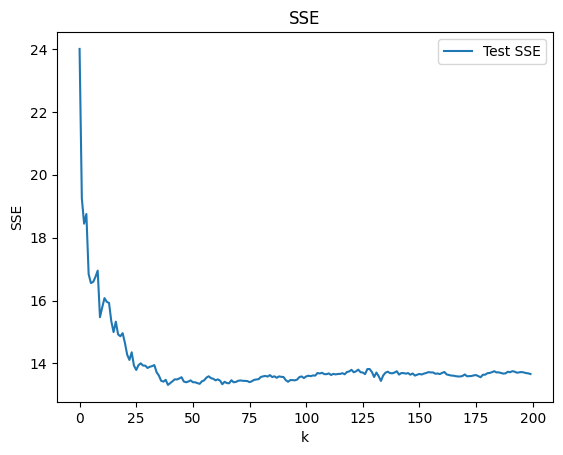

In [15]:
plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

In [16]:
# Q2.8
# OK, do steps 5 through 7 again, but use all of the variables (except time).
# Maxmin normalize all of the variables in X.
X_all = df.loc[:,'age':'smoking']
X_all = X_all.apply(maxmin)
X_all.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107
std,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000
50%,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [17]:
# Split the sample into ~80% for training and ~20% for evaluation.
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all,y,
                                                    test_size=.2,
                                                    random_state=100)

In [18]:
# Determine the optimal number of neighbors for a  k NN regression for the variables you selected.
k=3
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X_all,y)

In [19]:
k_bar = 200
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_all_train,y_train)
    y_hat = fitted_model.predict(X_all_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
    y_hat = fitted_model.predict(X_all_train)
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

[19]


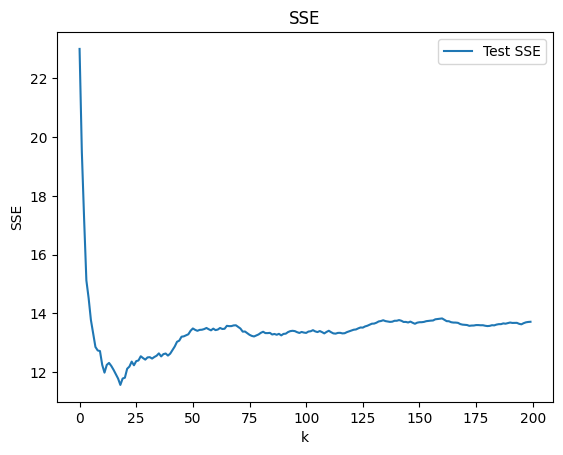

In [20]:
plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

In [21]:
# Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict DEATH_EVENTs?
# If you play with the selection of variables, how much does the SSE change for your fitted model on the test data?
# Are more variables always better? Explain your findings.

# The model using fewer variables has lower SSE. Thus, I would prefer to use this model vs. the all-variable model.
# The SSE changes more for variables that have less correlation with DEs, which makes the predictions less correlated.
# More variables are not always better, since sometimes they simply clutter the predictions.

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [22]:
# Q3.1
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 [==============================] - 0s 0us/step


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

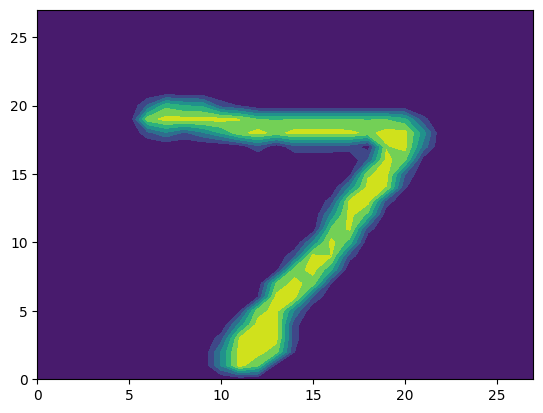

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

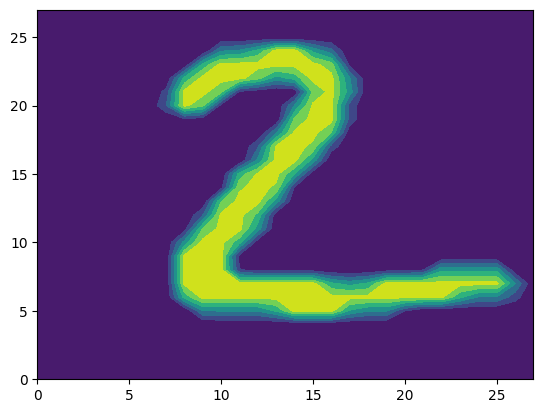

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

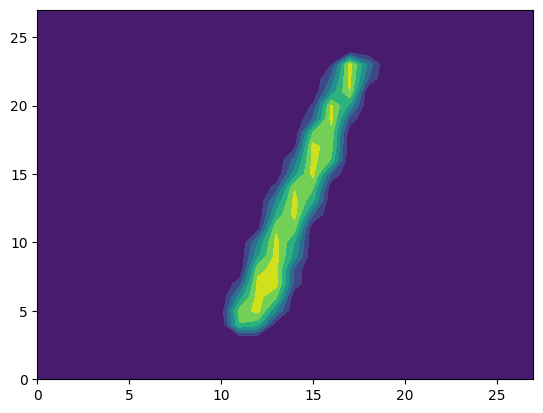

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

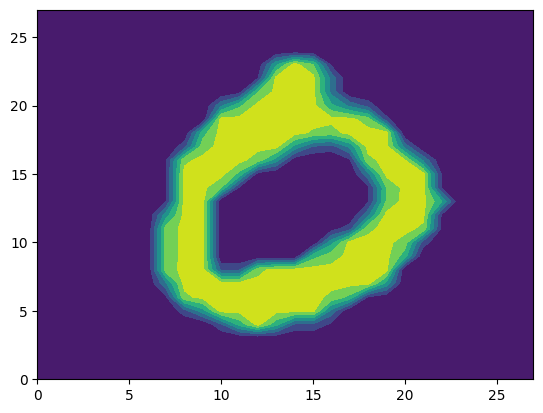

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

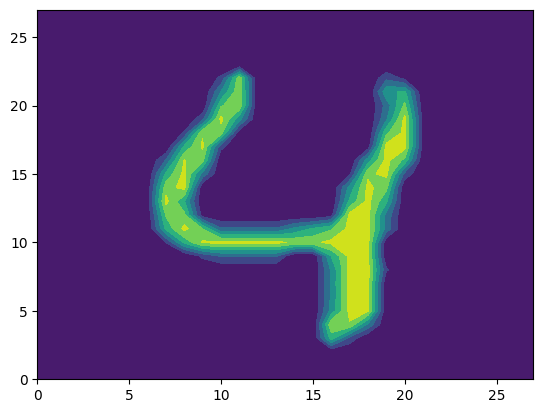

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  77 254 107   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19 227 254 254   9   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  81 254 254 165   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 203 254 254  7

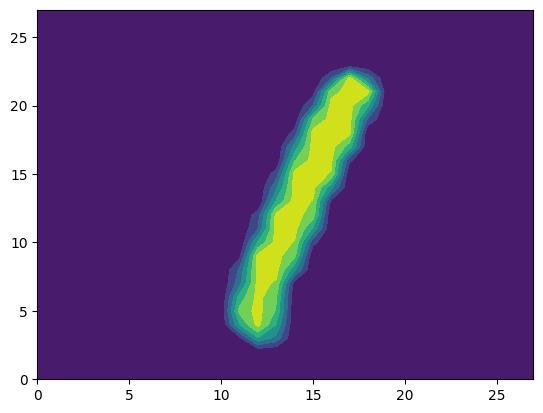

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  22 192 134  32   0   0   0   0   0   0   0   0  15  77   5   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17 235 250 169   0   0   0   0   0   0   0   0  15 220 241  37   0   0   0   0]
 [  0   0   0   0   0   0   0  20 189 253 147   0   0   0   0   0   0   0   0   0 139 253 100   0   0   0   0   0]
 [  0   0   0   0   0   0   0  70 253 253  21   0   0   0   0   0   0   0   

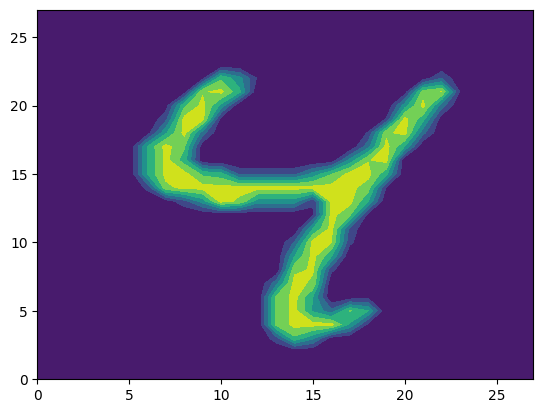

9 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  14 149 193   5   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  91 224 253 253  19   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  28 235 254 253 253 166  18   0   0   

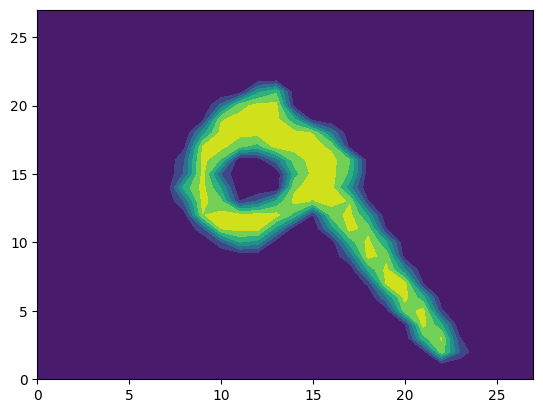

5 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  17  47  47  47  16 129  85  47   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  75 153 217 253 253 253 215 246 253 253   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  35 142 244 252 253 253 253 253 253 253 253 253 253   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 253 253 253 253 253 253 253 213 170 170 170 170   0   0   0]
 [  0   0   0   0   0   0   0   0  20 132  72   0  57 238 227 238 168 124  6

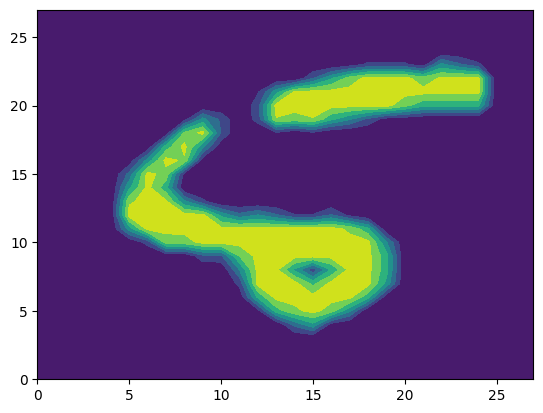

9 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  36  56 137 201 199  95  37   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  45 152 234 254 254 254 254 25

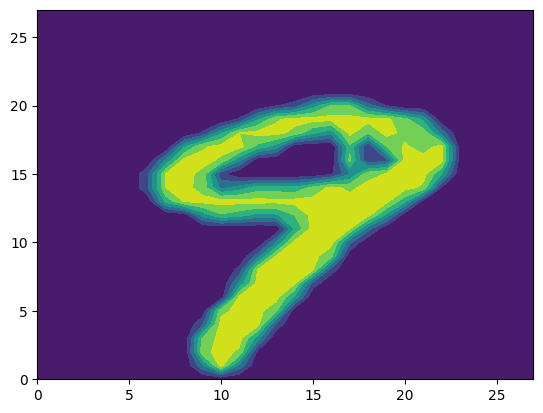

In [23]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(10):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

In [24]:
# Q3.2
# What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i?
# What is the shape of y_train and y_test?
X_train.shape
# 28 by 28 array, 60000 values
X_test.shape
# 28 by 28 array, 10000 values
X_train[i].shape
# 28 by 28 array for each i
X_test[i].shape
# 28 by 28 array for each i
y_train.shape
# 60000 values, no array
y_test.shape
# 10000 values

(10000,)

In [34]:
# Q3.3
# Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features.
# So, X_test[index].reshape((1,784)) will convert the  index -th element of X_test into a  28×28=784 -length row vector of values, rather than a matrix.
# Turn X_train into an  N×784  matrix  X  that is suitable for scikit-learn's kNN classifier where  N  is the number of observations and  784=28∗28
# (you could use, for example, a for loop).
X_train_reshape = np.empty((X_train.shape[0], 784))
for i2, i in enumerate(X_train):
  X_train_reshape[i2] = i.reshape((1,784))
X_train_reshape.shape
# I used chatgpt to help understand the reshape function for the array. OpenAI. (2024). ChatGPT (3.5) [Large language model]. https://chat.openai.com

(60000, 784)

In [35]:
X_test_reshape = np.empty((X_test.shape[0], 784))
for i2, i in enumerate(X_test):
  X_test_reshape[i2] = i.reshape((1,784))
X_test_reshape.shape

(10000, 784)

In [36]:
# Q3.4
# Use the reshaped X_test and y_test data to create a  k -nearest neighbor classifier of digit.
# What is the optimal number of neighbors  k ? If you can't determine this, play around with different values of  k  for your classifier.
k = 3
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X_test_reshape,y_test)

In [ ]:
k_bar = 200
SSE = np.zeros(k_bar)
SSE_on_test = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_test_reshape,y_test)
    y_hat = fitted_model.predict(X_test_reshape)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
    y_hat = fitted_model.predict(X_test_reshape)
    SSE_on_test[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

In [ ]:
# Q3.5
# For the optimal number of neighbors, how well does your predictor perform on the test set?

In [ ]:
# Q3.6
# So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset,
# and then we deploy ML tools on it as if it was any other kind of tabular data.
# To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data.
# (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)